## SR UCB

In [1]:
# Imports
from __future__ import print_function
import pickle
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib.collections import LineCollection
from matplotlib import cm
from copy import deepcopy
import plotly.graph_objects as go
from scipy.optimize import curve_fit
from dataclasses import make_dataclass
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import sys

module_path = 'src' 
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Markus's code
from MM_Plot_Utils import plot, hist
from MM_Maze_Utils import *
from MM_Traj_Utils import *

%matplotlib inline
%reload_ext autoreload
%autoreload 2

from plot_utils import plot_trajectory
from plot_utils import PlotMazeFunction_gradientcmap
import evaluation_metrics

In [2]:
from parameters import *

In [3]:
from SR_UCB_model import SR_UCB

In [4]:
model_SRUCB = SR_UCB()

In [6]:
beta = 10
gamma = 0.9
tau = 0.05
c = 1

In [13]:
epi_state_traj, epi_maze_traj, values_SR_hist, values_UCB_hist, model_hist, stats = model_SRUCB.simulate({0: [beta, gamma, tau, c]}, 10000)

beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

In [14]:
k = 0.01
cumu_prob = [1 - np.exp(-k * t) for t in np.arange(500)]
save_SR_prob = np.array([0])
for prob in cumu_prob[1:]:
    next_prob = 1 - (1 - prob) / np.prod(1 - save_SR_prob)
    save_SR_prob = np.append(save_SR_prob, next_prob)
    print(next_prob)

0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250831893
0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250831893
0.009950166250832004
0.009950166250832004
0.009950166250832004
0.009950166250831893
0.009950166250831893
0.009950166250831893
0.009950166250831893
0.009950166250832004
0.009950166250832004
0.009950166250832004
0.009950166250831893
0.009950166250831893
0.009950166250832004
0.009950166250832004
0.009950166250831893
0.009950166250832004
0.009950166250832004
0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250832004
0.009950166250832004
0.009950166250831782
0.009950166250831893
0.009950166250832004
0.009950166250831893
0.009950166250831893
0.009950166250832004
0.009950166250832004
0.009950166250831893
0.00995016625

In [15]:
save_SR_prob = np.ones(500)*0.01
temp = []
for i in np.arange(500):
    temp.append(1 - np.prod(1 - save_SR_prob[:i]))

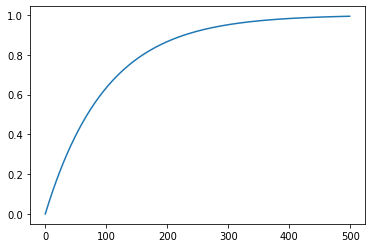

In [16]:
plt.plot(temp)

In [19]:
def model_next_step(time_from_last_rwd, SR_UCB, k = 0.01):#,max_switch_prob = 0.3):#the model for the next step
    if SR_UCB[0] == 0:#if the current model is SR
        if time_from_last_rwd == 0:#switch to the UCB model if the agent just gets the reward
            return 0, 1
        else:
            return 1, 0
    elif SR_UCB[0] == 1:#if the current model is UCB
        return 0.01, 0.99

In [20]:
steps = np.arange(500)
prob_from_SR_to_UCB = np.array([model_next_step(step, [0]) for step in steps])[:,1]
prob_from_UCB_to_SR = np.array([model_next_step(step, [1]) for step in steps])[:,0]

In [21]:
#prob_from_UCB_to_SR_cumu = [prob_from_UCB_to_SR[0:i].sum() for i in np.arange(prob_from_UCB_to_SR.size)]
#save_SR_prob = np.ones(500)*0.01
prob_from_UCB_to_SR_cumu = []
for i in np.arange(500):
    prob_from_UCB_to_SR_cumu.append(1 - np.prod(1 - prob_from_UCB_to_SR[:i]))

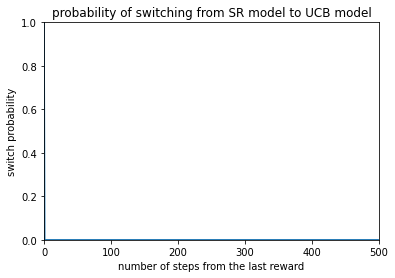

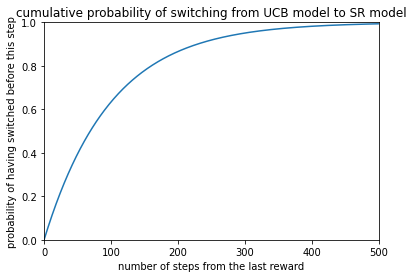

In [22]:
plt.plot(steps, prob_from_SR_to_UCB)
plt.xlim([0,500])
plt.ylim([0,1])
plt.xlabel('number of steps from the last reward')
plt.ylabel('switch probability')
plt.title('probability of switching from SR model to UCB model')
plt.show()

plt.plot(steps, prob_from_UCB_to_SR_cumu)
plt.xlim([0,500])
plt.ylim([0,1])
plt.xlabel('number of steps from the last reward')
plt.ylabel('probability of having switched before this step')
plt.title('cumulative probability of switching from UCB model to SR model')
plt.show()

In [23]:
np.logical_and(model_hist[0][:-1], np.abs(np.ediff1d(model_hist[0])))

array([False, False, False, ..., False, False, False])

In [24]:
model_duration = np.ediff1d(np.pad(np.where(np.abs(np.ediff1d(model_hist[0])))[0], (1, 1), 'constant', constant_values = (0, len(model_hist[0])-1)))

In [25]:
SR_idx = np.where(np.ediff1d(model_hist[0])[np.where(np.abs(np.ediff1d(model_hist[0])))[0]] == 1)[0]
UCB_idx = np.where(np.ediff1d(model_hist[0])[np.where(np.abs(np.ediff1d(model_hist[0])))[0]] == -1)[0]

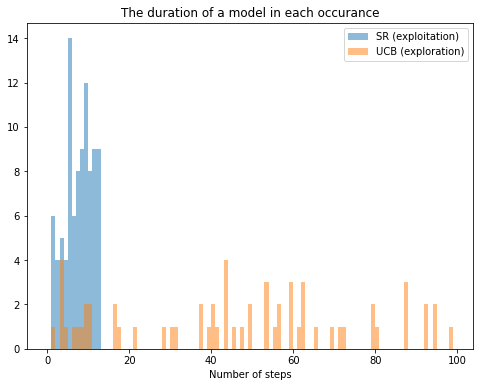

In [26]:
plt.figure(figsize=[8,6])
plt.hist(model_duration[SR_idx], bins = range(100), alpha = 0.5, label = 'SR (exploitation)')
plt.hist(model_duration[UCB_idx], bins = range(100), alpha = 0.5, label = 'UCB (exploration)')
plt.title('The duration of a model in each occurance')
plt.xlabel('Number of steps')
plt.legend(loc='upper right')
plt.show()

In [27]:
n_simu = 100
all_visit_frequencies = np.zeros([n_simu, 129])
for simu in range(n_simu):
    epi_state_traj, epi_maze_traj, values_SR_hist, values_UCB_hist, model_hist, stats = model_SRUCB.simulate({0: [beta, gamma, tau, c]}, 10000)
    all_visit_frequencies[simu,:] = stats[0]['visit_frequency'][:-1]

beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

In [28]:
mean_visit_frequencies = all_visit_frequencies.mean(axis = 0).astype(int)

In [29]:
all_trajs = np.array([])
for i in range(128):
    all_trajs = np.concatenate((all_trajs, np.ones(int(mean_visit_frequencies[i]))*i))

In [30]:
ma = NewMaze(6)

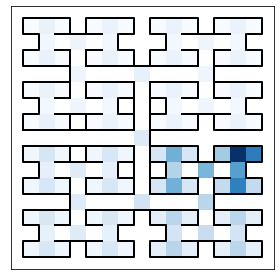

In [59]:
PlotMazeFunction_gradientcmap(all_trajs, ma, False, 'Blues')
plt.show()

In [60]:
all_effi_values = []
n_simu = 10
for simu in range(n_simu):
    epi_state_traj, epi_maze_traj, values_SR_hist, values_UCB_hist, model_hist, stats = model_SRUCB.simulate({0: [beta, gamma, tau, c]}, 10000)
    effi = evaluation_metrics.exploration_efficiency_sequential([epi_maze_traj[0]])
    effi_keys = effi.keys()
    effi_values = list(effi.values())
    all_effi_values.append(effi_values)
mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)
explo_effi = {k:v for k,v in zip(effi_keys, mean_effi_values)}

beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

<ipython-input-60-ccb7dc383e8d>:9: RuntimeWarning: Mean of empty slice
  mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)


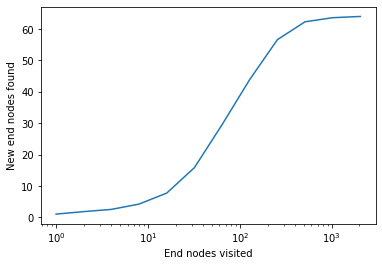

In [61]:
#plt.figure(figsize=(10,5))
plt.plot(explo_effi.keys(), explo_effi.values())
plt.xscale('log')
plt.xlabel('End nodes visited')
plt.ylabel('New end nodes found')
plt.show()

In [11]:
ma = NewMaze(6)

In [7]:
epi_state_traj, epi_maze_traj, values_SR_hist, values_UCB_hist, model_hist, stats = model_SRUCB.simulate({0: [beta, gamma, tau, c]}, 10000)

beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

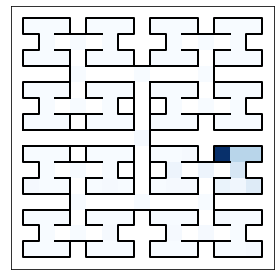

In [29]:
rwd_source = evaluation_metrics.get_direct_paths([epi_maze_traj[0]], 116, 'source')
PlotMazeFunction_gradientcmap(rwd_source, ma, False, 'Blues')
plt.show()

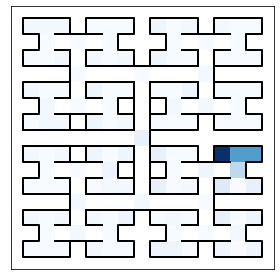

In [26]:
rwd_target = evaluation_metrics.get_direct_paths([epi_maze_traj[0]], 116, 'target')
PlotMazeFunction_gradientcmap(rwd_target, ma, False, 'Blues')
plt.show()

In [28]:
rwd_target

[69,
 69,
 121,
 121,
 115,
 115,
 0,
 0,
 115,
 115,
 111,
 111,
 115,
 115,
 123,
 123,
 17,
 17,
 115,
 115,
 116,
 57,
 115,
 115,
 28,
 28,
 50,
 50,
 121,
 121,
 113,
 113,
 74,
 74,
 115,
 115,
 60,
 60,
 115,
 115,
 103,
 103,
 5,
 5,
 124,
 124,
 116,
 57,
 79,
 79,
 115,
 115,
 116,
 57,
 116,
 57,
 111,
 111,
 99,
 99,
 28,
 28,
 4,
 4,
 116,
 57,
 63,
 63,
 28,
 28,
 126,
 126,
 116,
 57,
 116,
 57,
 116,
 57,
 116,
 57,
 88,
 88,
 96,
 96,
 107,
 107,
 116,
 57,
 117,
 117,
 100,
 100,
 116,
 57,
 102,
 102,
 115,
 115,
 116,
 57,
 115,
 115,
 83,
 83,
 30,
 30,
 77,
 77,
 115,
 115,
 115,
 115,
 28,
 28,
 115,
 115,
 123,
 123,
 118,
 118,
 115,
 115,
 2,
 2,
 116,
 57,
 115,
 115,
 113,
 113,
 13,
 13,
 116,
 57,
 81,
 81,
 115,
 115,
 115,
 115,
 77,
 77,
 116,
 57,
 116,
 57,
 104,
 104,
 115,
 115,
 115,
 115,
 117,
 117,
 28,
 28,
 115,
 115,
 115,
 115,
 28,
 28,
 79,
 79,
 116,
 57,
 116,
 57,
 116,
 57,
 0,
 0,
 115,
 115,
 115,
 115,
 117,
 117,
 116,
 57,
 115,


In [33]:
all_effi_values = []
n_simu = 10
for simu in range(n_simu):
    epi_state_traj, epi_maze_traj, values_SR_hist, values_UCB_hist, model_hist, stats = model_SRUCB.simulate({0: [beta, gamma, tau, c]}, 10000)
    effi = evaluation_metrics.exploration_efficiency_sequential([epi_maze_traj[0]])
    effi_keys = effi.keys()
    effi_values = list(effi.values())
    all_effi_values.append(effi_values)
mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)
explo_effi = {k:v for k,v in zip(effi_keys, mean_effi_values)}
SRUCB_explo_effi = explo_effi

beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
beta, gamma, tau, c, mouseID, speed, nick 10 0.9 0.05 1 0 0.3 B1
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Rewar

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Reached
Reward Rea

<ipython-input-33-f8f895ed6e35>:9: RuntimeWarning: Mean of empty slice
  mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)


In [35]:
# Some lists of nicknames for mice
RewNames=['B1','B2','B3','B4','C1','C3','C6','C7','C8','C9']
UnrewNames=['B5','B6','B7','D3','D4','D5','D6','D7','D8','D9']
AllNames=RewNames+UnrewNames
UnrewNamesSub=['B5','B6','B7','D3','D4','D5','D7','D8','D9'] # excluding D6 which barely entered the maze
all_effi_values = []
for rat in RewNames:
    tf = LoadTraj(rat+'-tf')
    this_trajs = np.array([])
    for i in range(len(tf.no)):
        this_trajs = np.concatenate((this_trajs, tf.no[i][:,0]))
    effi = evaluation_metrics.exploration_efficiency_sequential([this_trajs])
    effi_keys = effi.keys()
    effi_values = list(effi.values())
    all_effi_values.append(effi_values)
mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)
explo_effi = {k:v for k,v in zip(effi_keys, mean_effi_values)}
mice_explo_effi = explo_effi

<ipython-input-35-6f3ff329c439>:16: RuntimeWarning: Mean of empty slice
  mean_effi_values = np.nanmean(np.array(all_effi_values), axis = 0)


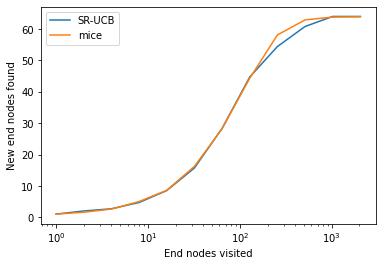

In [39]:
#plt.figure(figsize=(8,5))
plt.plot(explo_effi.keys(), SRUCB_explo_effi.values(), label = "SR-UCB")
plt.plot(explo_effi.keys(), mice_explo_effi.values(), label = "mice")
plt.xscale('log')
plt.xlabel('End nodes visited')
plt.ylabel('New end nodes found')
plt.legend()
plt.show()

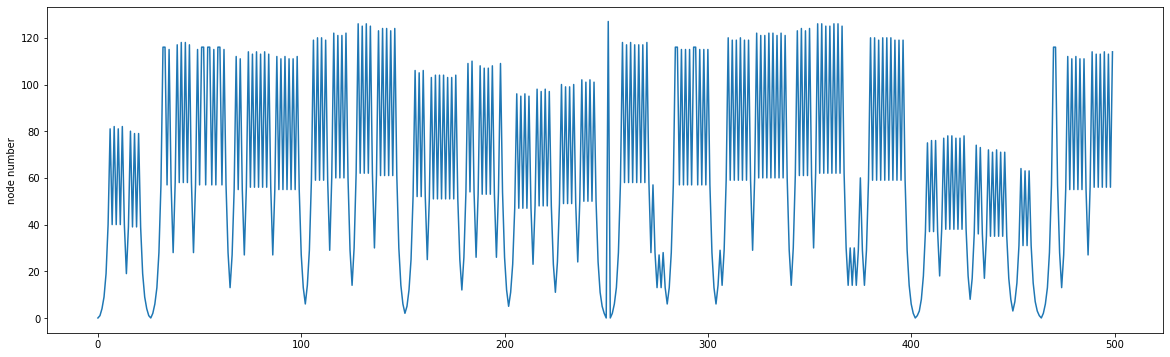

In [50]:
plt.figure(figsize=(20,6))
plt.plot(epi_maze_traj[0][:500])
plt.ylabel('node number')
plt.show()